In [311]:
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q pandas
!pip install -q sympy

In [312]:
dictData = {
    "StreamNo":[1,2,3,4],
    "Type":['hot', 'hot', 'cold', 'cold'],
    "CP":[3.0,1.0,2.0,4.5],
    "Ts":[180,150,20,80],
    "Tt":[60,30,135,140],
}

dictData

{'StreamNo': [1, 2, 3, 4],
 'Type': ['hot', 'hot', 'cold', 'cold'],
 'CP': [3.0, 1.0, 2.0, 4.5],
 'Ts': [180, 150, 20, 80],
 'Tt': [60, 30, 135, 140]}

In [313]:
import pandas as pd

df = pd.DataFrame(dictData)
df

,StreamNo,Type,CP,Ts,Tt
0,1,hot,3.0,180,60
1,2,hot,1.0,150,30
2,3,cold,2.0,20,135
3,4,cold,4.5,80,140


In [314]:
df['dH'] = (df['CP'] * (df['Ts'] - df['Tt'])).abs()
df['Hs'] = (df['CP'] * df['Ts']).abs()
df['Ht'] = (df['CP'] * df['Tt']).abs()
df

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
0,1,hot,3.0,180,60,360.0,540.0,180.0
1,2,hot,1.0,150,30,120.0,150.0,30.0
2,3,cold,2.0,20,135,230.0,40.0,270.0
3,4,cold,4.5,80,140,270.0,360.0,630.0


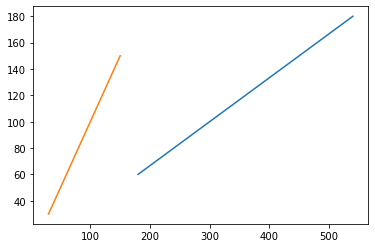

In [315]:
import matplotlib.pyplot as plt

fig = plt.figure()

x = [540,180]
y = [180,60]
plt.plot(x,y, label='s1')

x = [150, 30]
y = [150, 30]
plt.plot(x, y, label='s2')

plt.show()

In [316]:
dT = 10;
iT = dT/2;

(dT, iT)

(10, 5.0)

In [317]:
dfHot = df[df['Type']=='hot']
dfHot

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
0,1,hot,3.0,180,60,360.0,540.0,180.0
1,2,hot,1.0,150,30,120.0,150.0,30.0


In [318]:
yh = dfHot[['Ts','Tt']] - iT
yh

,Ts,Tt
0,175.0,55.0
1,145.0,25.0


In [319]:
dfCold = df[df['Type']=='cold']
dfCold

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
2,3,cold,2.0,20,135,230.0,40.0,270.0
3,4,cold,4.5,80,140,270.0,360.0,630.0


In [320]:
yc = dfCold[['Ts','Tt']] + iT
yc

,Ts,Tt
2,25.0,140.0
3,85.0,145.0


In [321]:
dfHC = pd.concat([yh, yc])
dfHC

,Ts,Tt
0,175.0,55.0
1,145.0,25.0
2,25.0,140.0
3,85.0,145.0


In [322]:
df[['iTs','iTt']] = dfHC
df

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht,iTs,iTt
0,1,hot,3.0,180,60,360.0,540.0,180.0,175.0,55.0
1,2,hot,1.0,150,30,120.0,150.0,30.0,145.0,25.0
2,3,cold,2.0,20,135,230.0,40.0,270.0,25.0,140.0
3,4,cold,4.5,80,140,270.0,360.0,630.0,85.0,145.0


In [323]:
dfHot

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
0,1,hot,3.0,180,60,360.0,540.0,180.0
1,2,hot,1.0,150,30,120.0,150.0,30.0


In [324]:
dfs = df[['StreamNo','Type','CP','Ts']]
dfs.columns = ['StreamNo','Type','CP','iT']
dfs

,StreamNo,Type,CP,iT
0,1,hot,3.0,180
1,2,hot,1.0,150
2,3,cold,2.0,20
3,4,cold,4.5,80


In [325]:
dft = df[['StreamNo','Type','CP','Tt']]
dft.columns = ['StreamNo','Type','CP','iT']
dft

,StreamNo,Type,CP,iT
0,1,hot,3.0,60
1,2,hot,1.0,30
2,3,cold,2.0,135
3,4,cold,4.5,140


In [326]:
dfPT = pd.concat([dfs,dft], axis=0)
dfPT

,StreamNo,Type,CP,iT
0,1,hot,3.0,180
1,2,hot,1.0,150
2,3,cold,2.0,20
3,4,cold,4.5,80
0,1,hot,3.0,60
1,2,hot,1.0,30
2,3,cold,2.0,135
3,4,cold,4.5,140


In [327]:
dfPT = dfPT.sort_values(by="iT", ascending=False)
dfPT['dH'] = dfPT['CP'] * dfPT['iT']
dfPT

,StreamNo,Type,CP,iT,dH
0,1,hot,3.0,180,540.0
1,2,hot,1.0,150,150.0
3,4,cold,4.5,140,630.0
2,3,cold,2.0,135,270.0
3,4,cold,4.5,80,360.0
0,1,hot,3.0,60,180.0
1,2,hot,1.0,30,30.0
2,3,cold,2.0,20,40.0


In [328]:
dfPT[['CPh','CPc']] = 0.0
dfPT

,StreamNo,Type,CP,iT,dH,CPh,CPc
0,1,hot,3.0,180,540.0,0.0,0.0
1,2,hot,1.0,150,150.0,0.0,0.0
3,4,cold,4.5,140,630.0,0.0,0.0
2,3,cold,2.0,135,270.0,0.0,0.0
3,4,cold,4.5,80,360.0,0.0,0.0
0,1,hot,3.0,60,180.0,0.0,0.0
1,2,hot,1.0,30,30.0,0.0,0.0
2,3,cold,2.0,20,40.0,0.0,0.0


In [329]:
dfPT = dfPT.reset_index(drop=True)
dfPT


,StreamNo,Type,CP,iT,dH,CPh,CPc
0,1,hot,3.0,180,540.0,0.0,0.0
1,2,hot,1.0,150,150.0,0.0,0.0
2,4,cold,4.5,140,630.0,0.0,0.0
3,3,cold,2.0,135,270.0,0.0,0.0
4,4,cold,4.5,80,360.0,0.0,0.0
5,1,hot,3.0,60,180.0,0.0,0.0
6,2,hot,1.0,30,30.0,0.0,0.0
7,3,cold,2.0,20,40.0,0.0,0.0


In [330]:
dfHot = dfPT[dfPT['Type']=='hot'].copy()
dfHot

,StreamNo,Type,CP,iT,dH,CPh,CPc
0,1,hot,3.0,180,540.0,0.0,0.0
1,2,hot,1.0,150,150.0,0.0,0.0
5,1,hot,3.0,60,180.0,0.0,0.0
6,2,hot,1.0,30,30.0,0.0,0.0


In [331]:
dfHotUniq = dfHot.drop_duplicates(subset=['StreamNo'])
dfHotUniq

,StreamNo,Type,CP,iT,dH,CPh,CPc
0,1,hot,3.0,180,540.0,0.0,0.0
1,2,hot,1.0,150,150.0,0.0,0.0


In [332]:
for i,v in dfHotUniq.iterrows():
    s = v['StreamNo']
    sCP = v['CP']
    iS = list(dfHot[dfHot['StreamNo']==s].index)
    print('s:', s, 'sCP:', sCP, 'iS:', iS, '--')
    dfHot.loc[iS[0]+1:iS[1], ["CPh"]] = dfHot.loc[iS[0]:iS[1], ["CPh"]] +sCP
    print(dfHot)
    # dfPT.loc[dfHot.loc[iS[0]:iS[1]].index,['CPh']] = dfPT.loc[dfHot.loc[iS[0]:iS[1]].index,['CPh']] + sCP
    # dfPT.loc[dfHot.loc[iS[0]:iS[1]].index,['iCP']] = dfPT.loc[dfHot.loc[iS[0]:iS[1]].index,['iCP']] + sCP

dfHot

s: 1 sCP: 3.0 iS: [0, 5] --
   StreamNo Type   CP   iT     dH  CPh  CPc
0         1  hot  3.0  180  540.0  0.0  0.0
1         2  hot  1.0  150  150.0  3.0  0.0
5         1  hot  3.0   60  180.0  3.0  0.0
6         2  hot  1.0   30   30.0  0.0  0.0
s: 2 sCP: 1.0 iS: [1, 6] --
   StreamNo Type   CP   iT     dH  CPh  CPc
0         1  hot  3.0  180  540.0  0.0  0.0
1         2  hot  1.0  150  150.0  3.0  0.0
5         1  hot  3.0   60  180.0  4.0  0.0
6         2  hot  1.0   30   30.0  1.0  0.0


,StreamNo,Type,CP,iT,dH,CPh,CPc
0,1,hot,3.0,180,540.0,0.0,0.0
1,2,hot,1.0,150,150.0,3.0,0.0
5,1,hot,3.0,60,180.0,4.0,0.0
6,2,hot,1.0,30,30.0,1.0,0.0


In [333]:
dfHot['diTh'] = -dfHot['iT'].diff()
dfHot['diTh'].iat[0] = 0
dfHot['diHh'] = dfHot['CPh']*dfHot['diTh']
# dfHot['iHh'] = dfHot['diHh']
# dfHot['iHh'].iat[0] = dfHot['dH'].iat[0]

dfHot

,StreamNo,Type,CP,iT,dH,CPh,CPc,diTh,diHh
0,1,hot,3.0,180,540.0,0.0,0.0,0.0,0.0
1,2,hot,1.0,150,150.0,3.0,0.0,30.0,90.0
5,1,hot,3.0,60,180.0,4.0,0.0,90.0,360.0
6,2,hot,1.0,30,30.0,1.0,0.0,30.0,30.0


In [334]:
dfHot = dfHot.sort_index(ascending=False)
dfHot['diHh'] = dfHot['diHh'].shift()
dfHot['diHh'].iat[0] = dfHot['dH'].iat[0]
dfHot['iHh'] = dfHot['diHh'].cumsum()
dfHot = dfHot.sort_index()

dfHot

,StreamNo,Type,CP,iT,dH,CPh,CPc,diTh,diHh,iHh
0,1,hot,3.0,180,540.0,0.0,0.0,0.0,90.0,510.0
1,2,hot,1.0,150,150.0,3.0,0.0,30.0,360.0,420.0
5,1,hot,3.0,60,180.0,4.0,0.0,90.0,30.0,60.0
6,2,hot,1.0,30,30.0,1.0,0.0,30.0,30.0,30.0


In [335]:
dfCold = dfPT[dfPT['Type']=='cold'].copy()
dfCold

,StreamNo,Type,CP,iT,dH,CPh,CPc
2,4,cold,4.5,140,630.0,0.0,0.0
3,3,cold,2.0,135,270.0,0.0,0.0
4,4,cold,4.5,80,360.0,0.0,0.0
7,3,cold,2.0,20,40.0,0.0,0.0


In [336]:
dfColdUniq = dfCold.drop_duplicates(subset=['StreamNo'])
dfColdUniq

,StreamNo,Type,CP,iT,dH,CPh,CPc
2,4,cold,4.5,140,630.0,0.0,0.0
3,3,cold,2.0,135,270.0,0.0,0.0


In [337]:
for i,v in dfColdUniq.iterrows():
    s = v['StreamNo']
    sCP = v['CP']
    iS = list(dfCold[dfCold['StreamNo']==s].index)
    print('s:', s, 'sCP:', sCP, 'iS:', iS, '--')
    dfCold.loc[iS[0]+1:iS[1], ["CPc"]] = dfCold.loc[iS[0]:iS[1], ["CPc"]] +sCP
    # dfPT.loc[dfCold.loc[iS[0]:iS[1]].index,['CPc']] = dfPT.loc[dfCold.loc[iS[0]:iS[1]].index,['CPc']] + sCP
    # dfPT.loc[dfCold.loc[iS[0]:iS[1]].index,['iCP']] = dfPT.loc[dfCold.loc[iS[0]:iS[1]].index,['iCP']] + sCP

dfCold

s: 4 sCP: 4.5 iS: [2, 4] --
s: 3 sCP: 2.0 iS: [3, 7] --


,StreamNo,Type,CP,iT,dH,CPh,CPc
2,4,cold,4.5,140,630.0,0.0,0.0
3,3,cold,2.0,135,270.0,0.0,4.5
4,4,cold,4.5,80,360.0,0.0,6.5
7,3,cold,2.0,20,40.0,0.0,2.0


In [338]:
dfCold['diTc'] = -dfCold['iT'].diff()
dfCold['diTc'].iat[0] = 0
dfCold['diHc'] = dfCold['CPc']*dfCold['diTc']

dfCold

,StreamNo,Type,CP,iT,dH,CPh,CPc,diTc,diHc
2,4,cold,4.5,140,630.0,0.0,0.0,0.0,0.0
3,3,cold,2.0,135,270.0,0.0,4.5,5.0,22.5
4,4,cold,4.5,80,360.0,0.0,6.5,55.0,357.5
7,3,cold,2.0,20,40.0,0.0,2.0,60.0,120.0


In [339]:
dfCold = dfCold.sort_index(ascending=False)
dfCold['diHc'] = dfCold['diHc'].shift()
dfCold['diHc'].iat[0] = dfCold['dH'].iat[0]
dfCold['iHc'] = dfCold['diHc'].cumsum()
dfCold = dfCold.sort_index()

dfCold

,StreamNo,Type,CP,iT,dH,CPh,CPc,diTc,diHc,iHc
2,4,cold,4.5,140,630.0,0.0,0.0,0.0,22.5,540.0
3,3,cold,2.0,135,270.0,0.0,4.5,5.0,357.5,517.5
4,4,cold,4.5,80,360.0,0.0,6.5,55.0,120.0,160.0
7,3,cold,2.0,20,40.0,0.0,2.0,60.0,40.0,40.0


In [340]:
dfHot

,StreamNo,Type,CP,iT,dH,CPh,CPc,diTh,diHh,iHh
0,1,hot,3.0,180,540.0,0.0,0.0,0.0,90.0,510.0
1,2,hot,1.0,150,150.0,3.0,0.0,30.0,360.0,420.0
5,1,hot,3.0,60,180.0,4.0,0.0,90.0,30.0,60.0
6,2,hot,1.0,30,30.0,1.0,0.0,30.0,30.0,30.0


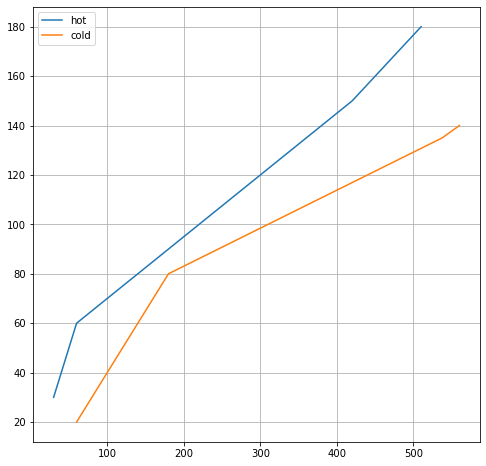

In [344]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

x=dfHot['iHh']
y=dfHot['iT']
plt.plot(x, y, label='hot')

x=dfCold['iHc']+20
y=dfCold['iT']
plt.plot(x, y, label='cold')

plt.grid(True)
plt.legend()

plt.show()

In [ ]:
import symbol as sym

sym.

In [1]:
45*6+6+9*16

420

In [2]:
420/3

140.0

In [7]:
140/5


28.0

In [8]:
3*28/9 - 1/45 --4/5

10.111111111111112